In [1]:
import _pickle as pickle
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import pandas as pd
import timeit

from itertools import product

from utils import set_size, pgf_with_latex

In [2]:
plt.style.use("seaborn-v0_8-colorblind")
# But with fonts from the document body
# plt.rcParams.update(pgf_with_latex)

# Using the set_size function as defined earlier
doc_width_pt = 452.9679

In [3]:
map_eval_name = {
    "pretraining": "",
    "pretrain-sample_high_prob_class_only-start_pos_0": "Condition on High Frequency",
    "pretrain-sample_low_prob_class_only-start_pos_0": "Condition on Low Frequency",
    "pretrain-sample_high_prob_class_only-start_pos_0-flip_label": "Condition on High Frequency",
    "pretrain-sample_low_prob_class_only-start_pos_0-flip_label": "Condition on Low Frequency",
    
    "pretrain-sample_high_prob_class_only-start_pos_1": "Condition on High Frequency",
    "pretrain-sample_low_prob_class_only-start_pos_1": "Condition on Low Frequency",
    "pretrain-sample_high_prob_class_only-start_pos_1-flip_label": "Condition on High Frequency",
    "pretrain-sample_low_prob_class_only-start_pos_1-flip_label": "Condition on Low Frequency",
    
    "pretrain-sample_high_prob_class_only-start_pos_7": "Condition on High Frequency",
    "pretrain-sample_low_prob_class_only-start_pos_7": "Condition on Low Frequency",
    "pretrain-sample_high_prob_class_only-start_pos_7-flip_label": "Condition on High Frequency",
    "pretrain-sample_low_prob_class_only-start_pos_7-flip_label": "Condition on Low Frequency",

    "eval-relevant_context-none": "Relevant Context",
    "eval-irrelevant_context-none": "Irrelevant Context",
}

stats_keys = [
    "accuracy",
    "p_iwl",
    "context contains query class",
    "loss",
    "ic_pred",
    "iw_pred",
]

In [4]:
repo_path = "/Users/chanb/research/ualberta/icl/simple_icl"
results_dir = "/Users/chanb/research/ualberta/icl/cc_results/paper_experiments/evaluation_results"


repo_path = "/home/bryanpu1/projects/icl/simple_icl"
results_dir = "/home/bryanpu1/projects/icl/scratch/evaluation_results"

In [5]:
variant_name = "synthetic-transformer-noisy_inputs"
variant_name = "omniglot-input_noise"

num_seeds = 1

checkpoint_steps = 500

stats_file = os.path.join(repo_path, "plot_utils/plots/agg_stats", "{}.feather".format(variant_name))
stats = pd.read_feather(stats_file)

os.makedirs(
    os.path.join(repo_path, "plot_utils/plots/acc-plots", variant_name),
    exist_ok=True
)

results_dir = os.path.join(results_dir, variant_name)
eval_namess = [
    [
        "pretraining"
    ],
    [
        "eval-relevant_context-none",
        "eval-irrelevant_context-none",
    ],
    [
        "pretrain-sample_high_prob_class_only-start_pos_0",
        "pretrain-sample_low_prob_class_only-start_pos_0",
    ],
    [
        "pretrain-sample_high_prob_class_only-start_pos_0-flip_label",
        "pretrain-sample_low_prob_class_only-start_pos_0-flip_label",
    ],
    [
        "pretrain-sample_high_prob_class_only-start_pos_1",
        "pretrain-sample_low_prob_class_only-start_pos_1",
    ],
    [
        "pretrain-sample_high_prob_class_only-start_pos_1-flip_label",
        "pretrain-sample_low_prob_class_only-start_pos_1-flip_label",
    ],
    [
        "pretrain-sample_high_prob_class_only-start_pos_7",
        "pretrain-sample_low_prob_class_only-start_pos_7",
    ],
    [
        "pretrain-sample_high_prob_class_only-start_pos_7-flip_label",
        "pretrain-sample_low_prob_class_only-start_pos_7-flip_label",
    ],
]
plot_names = [
    "pretraining",
    "context-default",
    "iwl",
    "iwl-flip_label",
    "icl-last_context",
    "icl-last_context-flip_label",
    "icl-except_first_context",
    "icl-except_first_context-flip_label",
]
plot_titles = [
    "Pretraining",
    "Context Default"
    "In-weight Evaluation",
    "In-weight Evaluation with Flipped Label",
    "In-context Evaluation with Last Context",
    "In-context Evaluation with Last Context + Flipped Label",
    "In-context Evaluation with Contexts but First",
    "In-context Evaluation with Contexts but First + Flipped Label",
]

map_stats_key = {
    "p_iwl": "$\\alpha(x)$",
    "accuracy": "Accuracy",
    "context contains query class": "Context Contains Query Class",
    "loss": "Loss",
    "ic_pred": "In-context Accuracy",
    "iw_pred": "In-weight Accuracy"
}

map_variant = {
    "ground_truth_prob": "$P(g(x) = c)$",
    "high_prob": "$P(high\_freq.)$"
}

In [6]:
variants = stats["variant"].unique()

# Transformer

In [7]:
stats["eval_name"].unique()

array(['eval-default-none-flip_label',
       'eval-default-high_prob-flip_label',
       'eval-default-low_prob-flip_label',
       'eval-relevant_context-none-flip_label',
       'eval-relevant_context-high_prob-flip_label',
       'eval-relevant_context-low_prob-flip_label',
       'eval-irrelevant_context-none-flip_label',
       'eval-irrelevant_context-high_prob-flip_label',
       'eval-irrelevant_context-low_prob-flip_label', 'eval-default-none',
       'eval-default-high_prob', 'eval-default-low_prob',
       'eval-relevant_context-none', 'eval-relevant_context-high_prob',
       'eval-relevant_context-low_prob', 'eval-irrelevant_context-none',
       'eval-irrelevant_context-high_prob',
       'eval-irrelevant_context-low_prob', 'pretraining'], dtype=object)

In [8]:
stats

,dirname,variant,seed,eval_name,stats_key,stats,dataset_size,p_relevant_context,input_noise_std
0,omniglot-input_noise,dataset_size_10000-p_relevant_context_0.9-inpu...,seed_1,eval-default-none-flip_label,accuracy,"[0.0, 0.003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",10000,0.9,0.1
1,omniglot-input_noise,dataset_size_10000-p_relevant_context_0.9-inpu...,seed_1,eval-default-none-flip_label,context contains query class,"[0.133, 0.133, 0.133, 0.133, 0.133, 0.133, 0.1...",10000,0.9,0.1
2,omniglot-input_noise,dataset_size_10000-p_relevant_context_0.9-inpu...,seed_1,eval-default-none-flip_label,loss,"[7.858643054962158, 7.570783615112305, 8.65740...",10000,0.9,0.1
3,omniglot-input_noise,dataset_size_10000-p_relevant_context_0.9-inpu...,seed_1,eval-default-high_prob-flip_label,accuracy,"[0.0, 0.009, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",10000,0.9,0.1
4,omniglot-input_noise,dataset_size_10000-p_relevant_context_0.9-inpu...,seed_1,eval-default-high_prob-flip_label,context contains query class,"[0.165, 0.165, 0.165, 0.165, 0.165, 0.165, 0.1...",10000,0.9,0.1
...,...,...,...,...,...,...,...,...,...
1534,omniglot-input_noise,dataset_size_1000000-p_relevant_context_1.0-in...,seed_1,eval-irrelevant_context-low_prob,context contains query class,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1000000,1.0,0.2
1535,omniglot-input_noise,dataset_size_1000000-p_relevant_context_1.0-in...,seed_1,eval-irrelevant_context-low_prob,loss,"[7.904811382293701, 8.27088737487793, 9.135965...",1000000,1.0,0.2
1536,omniglot-input_noise,dataset_size_1000000-p_relevant_context_1.0-in...,seed_1,pretraining,accuracy,"[0.0, 0.9298, 0.9794, 0.9997, 0.9999, 0.9706, ...",1000000,1.0,0.2
1537,omniglot-input_noise,dataset_size_1000000-p_relevant_context_1.0-in...,seed_1,pretraining,context contains query class,"[0.1606, 0.1606, 0.1606, 0.1606, 0.1606, 0.160...",1000000,1.0,0.2


In [9]:
dataset_sizes = sorted([int(dataset_size) for dataset_size in stats["dataset_size"].unique()])
input_noise_stds = sorted([float(input_noise_std) for input_noise_std in stats["input_noise_std"].unique()])

# Pretraining

### Loss

In [95]:
best_idxes = dict()

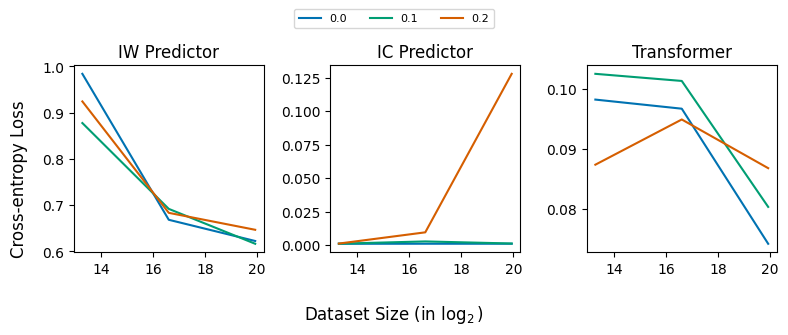

In [96]:
map_label = {
    0.0: "IW Predictor",
    1.0: "IC Predictor",
    0.9: "Transformer",
}

fig, axes = plt.subplots(1, 3, figsize=(8, 3))
for ax_i, p_relevant_context in enumerate([0.0, 1.0, 0.9]):
    ax = axes[ax_i]
    for variant_i, input_noise_std in enumerate(input_noise_stds):
        losses_mean = []
        losses_std = []

        for dataset_size in dataset_sizes:
            data = (np.array(stats[
                (stats["p_relevant_context"] == f"{p_relevant_context}")
                & (stats["input_noise_std"] == f"{input_noise_std}")
                & (stats["stats_key"] == "loss")
                & (stats["eval_name"] == "pretraining")
                & (stats["dataset_size"] == f"{dataset_size}")
            ]["stats"].to_list()))
            best_idx = data.shape[1] - np.argmin(data[:, ::-1], axis=-1) - 1
            best_idx[:] = 5

            best_idxes[(
                p_relevant_context, input_noise_std, dataset_size
            )] = best_idx

            sample = data[np.arange(num_seeds), best_idx]
            curr_mean = np.mean(sample)
            curr_std = np.std(sample)

            losses_mean.append(curr_mean)
            losses_std.append(curr_std)

        losses_mean = np.array(losses_mean)
        losses_std = np.array(losses_std) / np.sqrt(5)

        ax.plot(np.log2(np.array(dataset_sizes)), losses_mean, label=input_noise_std if ax_i == 0 else "")
        ax.fill_between(np.log2(np.array(dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

    ax.set_title(map_label[p_relevant_context])
    # ax.set_ylim(0.0, 0.009)

fig.supylabel("Cross-entropy Loss")
fig.supxlabel("Dataset Size (in $\\log_2$)")
fig.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=4,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)
fig.tight_layout()
plt.show()

### Accuracy

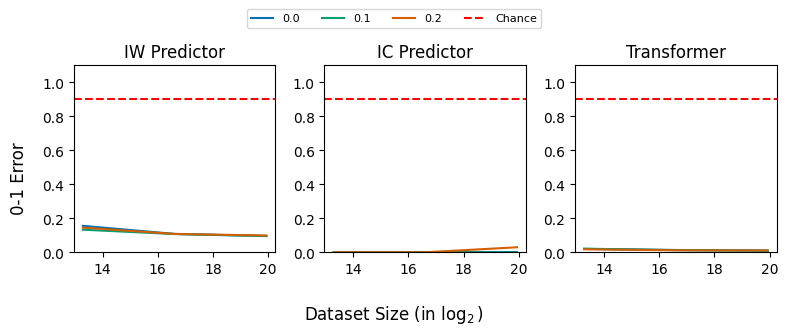

In [97]:
map_label = {
    0.0: "IW Predictor",
    1.0: "IC Predictor",
    0.9: "Transformer",
}

fig, axes = plt.subplots(1, 3, figsize=(8, 3))
for ax_i, p_relevant_context in enumerate([0.0, 1.0, 0.9]):
    ax = axes[ax_i]
    for variant_i, input_noise_std in enumerate(input_noise_stds):
        losses_mean = []
        losses_std = []

        for dataset_size in dataset_sizes:
            data = 1 - (np.array(stats[
                (stats["p_relevant_context"] == f"{p_relevant_context}")
                & (stats["input_noise_std"] == f"{input_noise_std}")
                & (stats["stats_key"] == "accuracy")
                & (stats["eval_name"] == "pretraining")
                & (stats["dataset_size"] == f"{dataset_size}")
            ]["stats"].to_list()))
            best_idx = best_idxes[(
                p_relevant_context, input_noise_std, dataset_size
            )]
            sample = data[np.arange(num_seeds), best_idx]
            curr_mean = np.mean(sample)
            curr_std = np.std(sample)
            
            losses_mean.append(curr_mean)
            losses_std.append(curr_std)

        losses_mean = np.array(losses_mean)
        losses_std = np.array(losses_std) / np.sqrt(5)

        ax.plot(np.log2(np.array(dataset_sizes)), losses_mean, label=input_noise_std if ax_i == 0 else "")
        ax.fill_between(np.log2(np.array(dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

    ax.set_title(map_label[p_relevant_context])
    ax.set_ylim(0.0, 1.1)
    ax.axhline(9/10, label="Chance" if ax_i == 0 else "", c="red", linestyle="--")

fig.supylabel("0-1 Error")
fig.supxlabel("Dataset Size (in $\\log_2$)")
fig.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=5,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)
fig.tight_layout()
plt.show()

## General Plots

In [98]:
stats[
                        (stats["p_relevant_context"] == f"{p_relevant_context}")
                        & (stats["input_noise_std"] == f"{input_noise_std}")
                        & (stats["stats_key"] == "loss")
                        & (stats["dataset_size"] == f"{dataset_size}")
                    ]["stats"]

458    [7.823727130889893, 7.528921604156494, 8.70889...
461    [7.824697494506836, 7.297519683837891, 8.43801...
464    [7.8421950340271, 7.794353008270264, 8.9577865...
467    [7.843616008758545, 7.6530656814575195, 8.8828...
470    [7.82835578918457, 7.576245307922363, 8.759915...
473    [7.84769868850708, 7.766633987426758, 8.978398...
476    [7.780128479003906, 6.296270847320557, 7.34889...
479    [7.765242099761963, 5.312918186187744, 6.31289...
482    [7.886090278625488, 8.19050121307373, 8.867396...
485    [7.637016773223877, 0.8954097032546997, 0.4079...
488    [7.616026878356934, 0.9025224447250366, 0.0655...
491    [7.615065097808838, 0.92275071144104, 0.920080...
494    [7.596688747406006, 0.37252941727638245, 0.030...
497    [7.582254886627197, 0.4627018868923187, 0.0372...
500    [7.569925308227539, 0.09399419277906418, 0.013...
503    [7.773176193237305, 5.8334269523620605, 3.5365...
506    [7.722134113311768, 4.505504131317139, 0.32605...
509    [7.901833534240723, 8.09

In [99]:
p_relevant_context, input_noise_std, eval_name, dataset_size

(0.9, 0.2, 'eval-default-none-flip_label', 1000000)

In [100]:
stats["eval_name"].unique()

array(['eval-default-none-flip_label',
       'eval-default-high_prob-flip_label',
       'eval-default-low_prob-flip_label',
       'eval-relevant_context-none-flip_label',
       'eval-relevant_context-high_prob-flip_label',
       'eval-relevant_context-low_prob-flip_label',
       'eval-irrelevant_context-none-flip_label',
       'eval-irrelevant_context-high_prob-flip_label',
       'eval-irrelevant_context-low_prob-flip_label', 'eval-default-none',
       'eval-default-high_prob', 'eval-default-low_prob',
       'eval-relevant_context-none', 'eval-relevant_context-high_prob',
       'eval-relevant_context-low_prob', 'eval-irrelevant_context-none',
       'eval-irrelevant_context-high_prob',
       'eval-irrelevant_context-low_prob', 'pretraining'], dtype=object)

In [101]:
stats

,dirname,variant,seed,eval_name,stats_key,stats,dataset_size,p_relevant_context,input_noise_std
0,omniglot-input_noise,dataset_size_10000-p_relevant_context_0.9-inpu...,seed_1,eval-default-none-flip_label,accuracy,"[0.0, 0.003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",10000,0.9,0.1
1,omniglot-input_noise,dataset_size_10000-p_relevant_context_0.9-inpu...,seed_1,eval-default-none-flip_label,context contains query class,"[0.133, 0.133, 0.133, 0.133, 0.133, 0.133, 0.1...",10000,0.9,0.1
2,omniglot-input_noise,dataset_size_10000-p_relevant_context_0.9-inpu...,seed_1,eval-default-none-flip_label,loss,"[7.858643054962158, 7.570783615112305, 8.65740...",10000,0.9,0.1
3,omniglot-input_noise,dataset_size_10000-p_relevant_context_0.9-inpu...,seed_1,eval-default-high_prob-flip_label,accuracy,"[0.0, 0.009, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",10000,0.9,0.1
4,omniglot-input_noise,dataset_size_10000-p_relevant_context_0.9-inpu...,seed_1,eval-default-high_prob-flip_label,context contains query class,"[0.165, 0.165, 0.165, 0.165, 0.165, 0.165, 0.1...",10000,0.9,0.1
...,...,...,...,...,...,...,...,...,...
1534,omniglot-input_noise,dataset_size_1000000-p_relevant_context_1.0-in...,seed_1,eval-irrelevant_context-low_prob,context contains query class,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1000000,1.0,0.2
1535,omniglot-input_noise,dataset_size_1000000-p_relevant_context_1.0-in...,seed_1,eval-irrelevant_context-low_prob,loss,"[7.904811382293701, 8.27088737487793, 9.135965...",1000000,1.0,0.2
1536,omniglot-input_noise,dataset_size_1000000-p_relevant_context_1.0-in...,seed_1,pretraining,accuracy,"[0.0, 0.9298, 0.9794, 0.9997, 0.9999, 0.9706, ...",1000000,1.0,0.2
1537,omniglot-input_noise,dataset_size_1000000-p_relevant_context_1.0-in...,seed_1,pretraining,context contains query class,"[0.1606, 0.1606, 0.1606, 0.1606, 0.1606, 0.160...",1000000,1.0,0.2


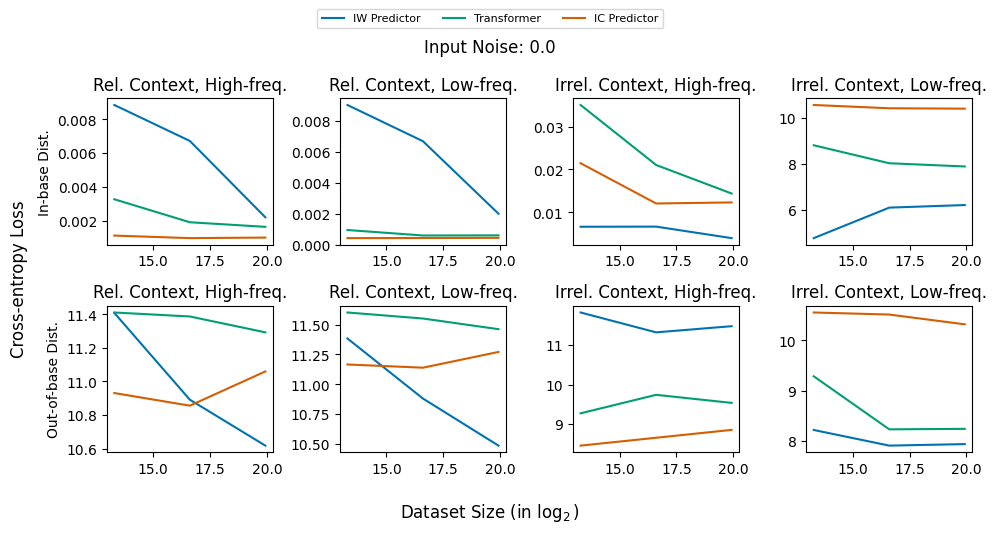

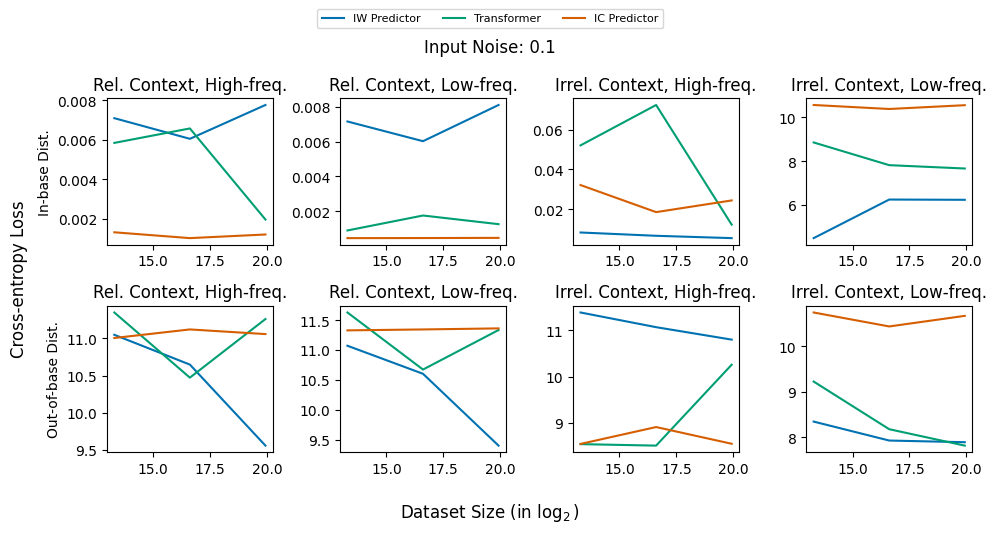

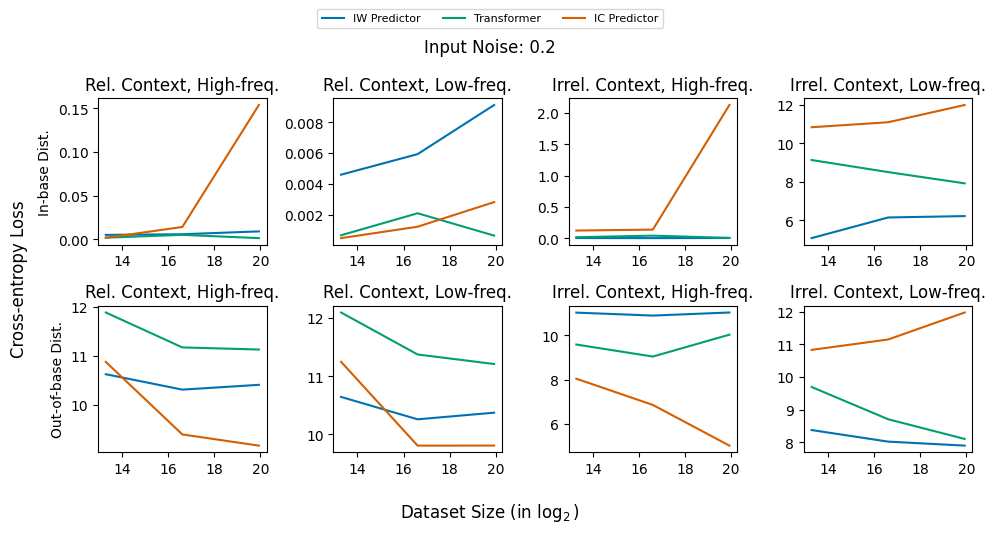

In [102]:
map_label = {
    0.0: "IW Predictor",
    1.0: "IC Predictor",
    0.9: "Transformer",
}
map_eval = {
    "eval-relevant_context-high_prob": "Rel. Context, High-freq.",
    "eval-relevant_context-low_prob": "Rel. Context, Low-freq.",
    "eval-irrelevant_context-high_prob": "Irrel. Context, High-freq.",
    "eval-irrelevant_context-low_prob": "Irrel. Context, Low-freq.",
    "eval-relevant_context-high_prob-flip_label": "Rel. Context, High-freq.",
    "eval-relevant_context-low_prob-flip_label": "Rel. Context, Low-freq.",
    "eval-irrelevant_context-high_prob-flip_label": "Irrel. Context, High-freq.",
    "eval-irrelevant_context-low_prob-flip_label": "Irrel. Context, Low-freq.",
}

eval_namess = [
    [
        "eval-relevant_context-high_prob",
        "eval-relevant_context-low_prob",
        "eval-irrelevant_context-high_prob",
        "eval-irrelevant_context-low_prob",
    ],
    [
        "eval-relevant_context-high_prob-flip_label",
        "eval-relevant_context-low_prob-flip_label",
        "eval-irrelevant_context-high_prob-flip_label",
        "eval-irrelevant_context-low_prob-flip_label",
    ],
]

for input_noise_std in input_noise_stds:
    fig, axes = plt.subplots(2, 4, figsize=(10, 5))
    for row_i, eval_names in enumerate(eval_namess):
        for eval_i, eval_name in enumerate(eval_names):
            ax = axes[row_i, eval_i]
            # ax = axes[eval_i]
            for p_relevant_context in [0.0, 0.9, 1.0]:
                losses_mean = []
                losses_std = []

                for dataset_size in dataset_sizes:
                    data = (np.array(stats[
                        (stats["p_relevant_context"] == f"{p_relevant_context}")
                        & (stats["input_noise_std"] == f"{input_noise_std}")
                        & (stats["stats_key"] == "loss")
                        & (stats["eval_name"] == eval_name)
                        & (stats["dataset_size"] == f"{dataset_size}")
                    ]["stats"].to_list()))
                    best_idx = best_idxes[(
                        p_relevant_context, input_noise_std, dataset_size
                    )]
                    sample = data[np.arange(num_seeds), best_idx]
                    curr_mean = np.mean(sample)
                    curr_std = np.std(sample)
                    
                    losses_mean.append(curr_mean)
                    losses_std.append(curr_std)

                losses_mean = np.array(losses_mean)
                losses_std = np.array(losses_std) / np.sqrt(num_seeds)

                ax.plot(np.log2(np.array(dataset_sizes)), losses_mean, label=map_label[p_relevant_context] if eval_i == 0 and row_i == 0 else "")
                ax.fill_between(np.log2(np.array(dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

            ax.set_title(map_eval[eval_name])
            # ax.set_ylim(-1.0, 1.5)
            if eval_i == 0:
                ax.set_ylabel("In-base Dist." if row_i == 0 else "Out-of-base Dist.")

    fig.suptitle("Input Noise: {}".format(input_noise_std))
    fig.supylabel("Cross-entropy Loss")
    fig.supxlabel("Dataset Size (in $\\log_2$)")
    fig.legend(
        bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
        loc="lower center",
        ncols=4,
        borderaxespad=0.0,
        frameon=True,
        fontsize="8", 
    )
    fig.tight_layout()
    plt.show()

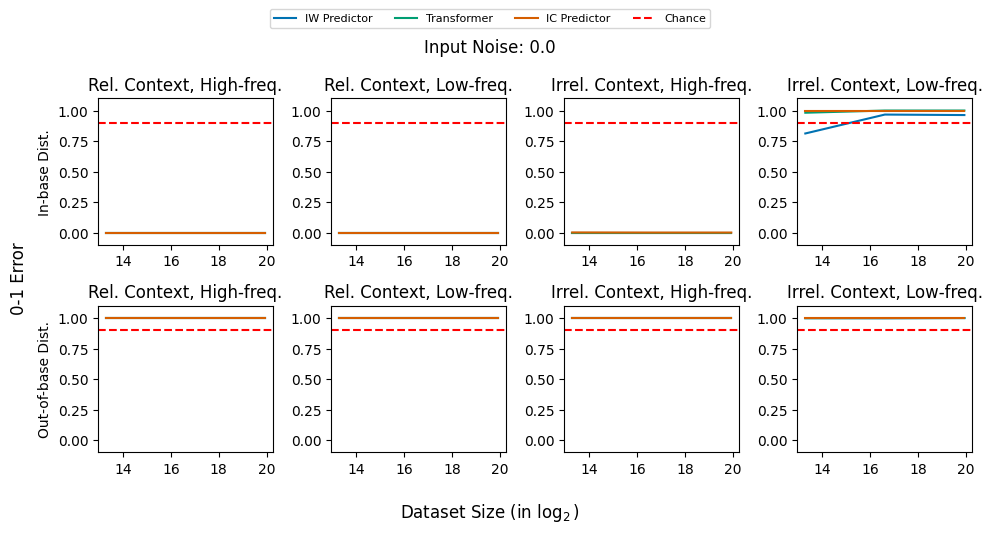

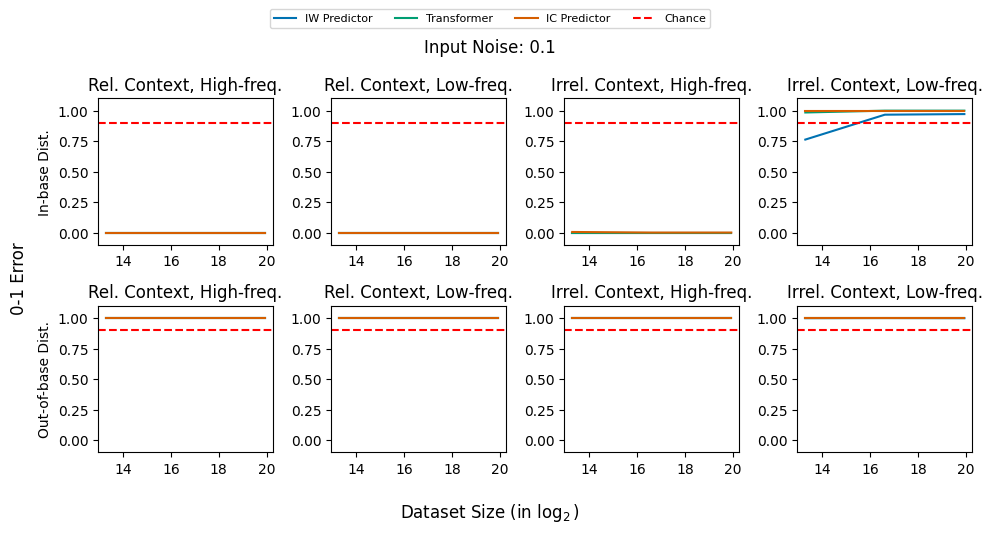

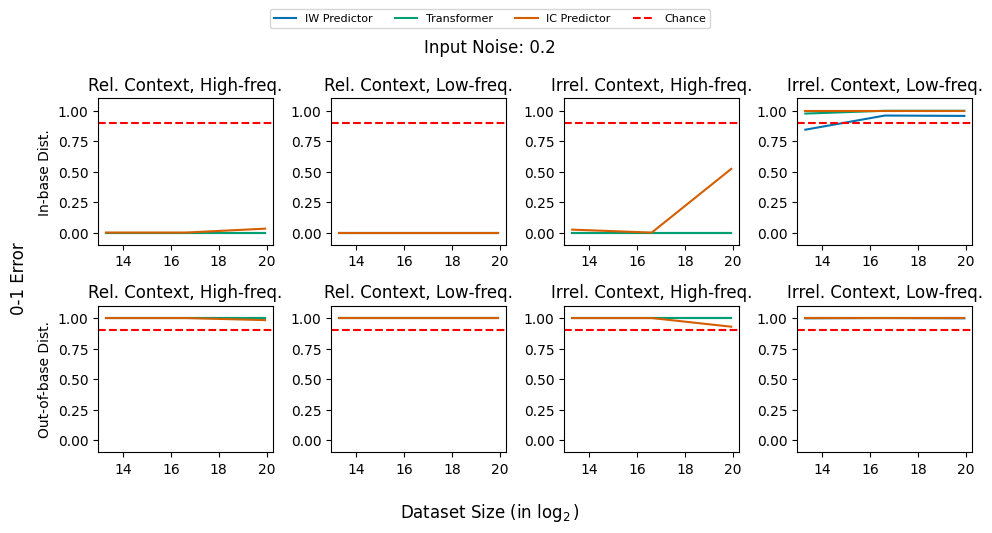

In [103]:
map_label = {
    0.0: "IW Predictor",
    1.0: "IC Predictor",
    0.9: "Transformer",
}
map_eval = {
    "eval-relevant_context-high_prob": "Rel. Context, High-freq.",
    "eval-relevant_context-low_prob": "Rel. Context, Low-freq.",
    "eval-irrelevant_context-high_prob": "Irrel. Context, High-freq.",
    "eval-irrelevant_context-low_prob": "Irrel. Context, Low-freq.",
    "eval-relevant_context-high_prob-flip_label": "Rel. Context, High-freq.",
    "eval-relevant_context-low_prob-flip_label": "Rel. Context, Low-freq.",
    "eval-irrelevant_context-high_prob-flip_label": "Irrel. Context, High-freq.",
    "eval-irrelevant_context-low_prob-flip_label": "Irrel. Context, Low-freq.",
}

eval_namess = [
    [
        "eval-relevant_context-high_prob",
        "eval-relevant_context-low_prob",
        "eval-irrelevant_context-high_prob",
        "eval-irrelevant_context-low_prob",
    ],
    [
        "eval-relevant_context-high_prob-flip_label",
        "eval-relevant_context-low_prob-flip_label",
        "eval-irrelevant_context-high_prob-flip_label",
        "eval-irrelevant_context-low_prob-flip_label",
    ],
]
for input_noise_std in input_noise_stds:
    fig, axes = plt.subplots(2, 4, figsize=(10, 5))
    for row_i, eval_names in enumerate(eval_namess):
        for eval_i, eval_name in enumerate(eval_names):
            ax = axes[row_i, eval_i]
            # ax = axes[eval_i]
            for p_relevant_context in [0.0, 0.9, 1.0]:
                losses_mean = []
                losses_std = []

                for dataset_size in dataset_sizes:
                    data = 1 - (np.array(stats[
                        (stats["p_relevant_context"] == f"{p_relevant_context}")
                        & (stats["input_noise_std"] == f"{input_noise_std}")
                        & (stats["stats_key"] == "accuracy")
                        & (stats["eval_name"] == eval_name)
                        & (stats["dataset_size"] == f"{dataset_size}")
                    ]["stats"].to_list()))
                    best_idx = best_idxes[(
                        p_relevant_context, input_noise_std, dataset_size
                    )]
                    sample = data[np.arange(num_seeds), best_idx]
                    curr_mean = np.mean(sample)
                    curr_std = np.std(sample)
                    
                    losses_mean.append(curr_mean)
                    losses_std.append(curr_std)

                losses_mean = np.array(losses_mean)
                losses_std = np.array(losses_std) / np.sqrt(num_seeds)

                ax.plot(np.log2(np.array(dataset_sizes)), losses_mean, label=map_label[p_relevant_context] if eval_i == 0 and row_i == 0 else "")
                ax.fill_between(np.log2(np.array(dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

            ax.set_title(map_eval[eval_name])
            ax.axhline(9/10, label="Chance" if eval_i == 0 and row_i == 0 else "", c="red", linestyle="--")
            ax.set_ylim(-0.1, 1.1)

            if eval_i == 0:
                ax.set_ylabel("In-base Dist." if row_i == 0 else "Out-of-base Dist.")

    fig.suptitle("Input Noise: {}".format(input_noise_std))
    fig.supylabel("0-1 Error")
    fig.supxlabel("Dataset Size (in $\\log_2$)")
    fig.legend(
        bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
        loc="lower center",
        ncols=4,
        borderaxespad=0.0,
        frameon=True,
        fontsize="8", 
    )
    fig.tight_layout()
    plt.show()

In [104]:
stats["eval_name"].unique()

array(['eval-default-none-flip_label',
       'eval-default-high_prob-flip_label',
       'eval-default-low_prob-flip_label',
       'eval-relevant_context-none-flip_label',
       'eval-relevant_context-high_prob-flip_label',
       'eval-relevant_context-low_prob-flip_label',
       'eval-irrelevant_context-none-flip_label',
       'eval-irrelevant_context-high_prob-flip_label',
       'eval-irrelevant_context-low_prob-flip_label', 'eval-default-none',
       'eval-default-high_prob', 'eval-default-low_prob',
       'eval-relevant_context-none', 'eval-relevant_context-high_prob',
       'eval-relevant_context-low_prob', 'eval-irrelevant_context-none',
       'eval-irrelevant_context-high_prob',
       'eval-irrelevant_context-low_prob', 'pretraining'], dtype=object)

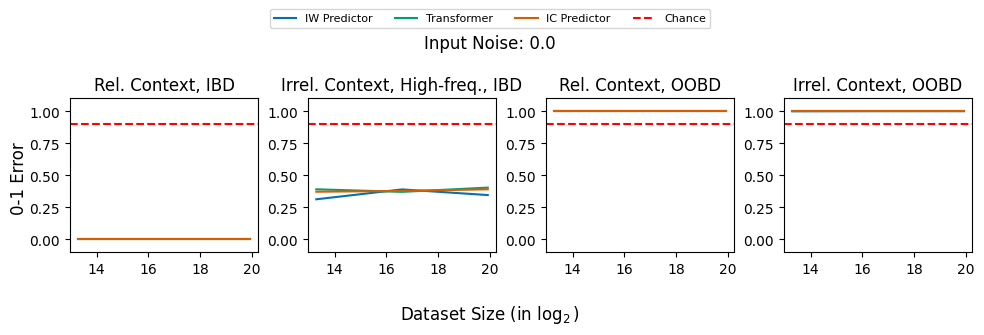

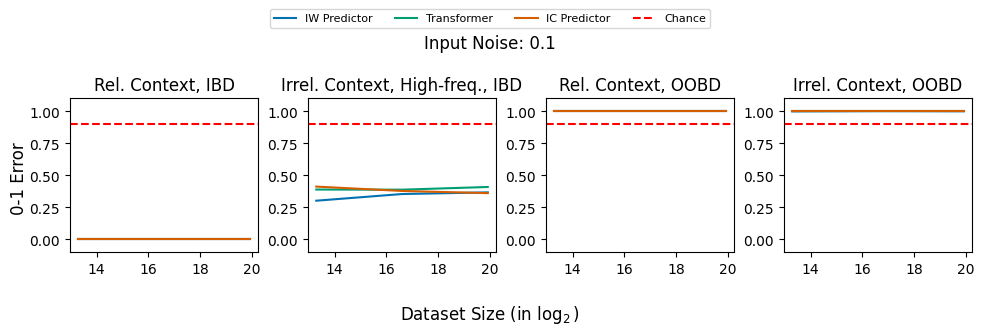

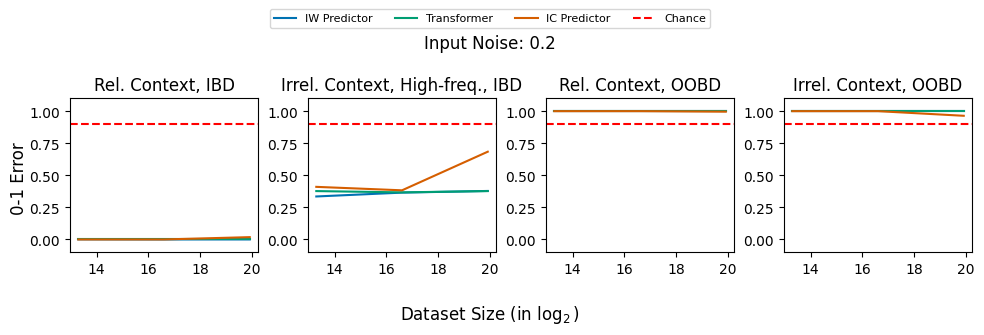

In [105]:
map_label = {
    0.0: "IW Predictor",
    1.0: "IC Predictor",
    0.9: "Transformer",
}
map_eval = {
    "eval-relevant_context-high_prob": "Rel. Context, High-freq.",
    "eval-relevant_context-low_prob": "Rel. Context, Low-freq.",
    "eval-irrelevant_context-high_prob": "Irrel. Context, High-freq.",
    "eval-irrelevant_context-low_prob": "Irrel. Context, Low-freq.",
    "eval-relevant_context-high_prob-flip_label": "Rel. Context, High-freq.",
    "eval-relevant_context-low_prob-flip_label": "Rel. Context, Low-freq.",
    "eval-irrelevant_context-high_prob-flip_label": "Irrel. Context, High-freq.",
    "eval-irrelevant_context-low_prob-flip_label": "Irrel. Context, Low-freq.",
    "eval-relevant_context-none": "Rel. Context, IBD",
    "eval-relevant_context-none-flip_label": "Rel. Context, OOBD",
    "eval-irrelevant_context-none": "Irrel. Context, High-freq., IBD",
    "eval-irrelevant_context-none-flip_label": "Irrel. Context, OOBD",
}

eval_names = [
    "eval-relevant_context-none",
    "eval-irrelevant_context-none",
    "eval-relevant_context-none-flip_label",
    "eval-irrelevant_context-none-flip_label",
]
for input_noise_std in input_noise_stds:
    fig, axes = plt.subplots(1, 4, figsize=(10, 3))
    for eval_i, eval_name in enumerate(eval_names):
        ax = axes[eval_i]
        for p_relevant_context in [0.0, 0.9, 1.0]:
            losses_mean = []
            losses_std = []

            for dataset_size in dataset_sizes:
                data = 1 - (np.array(stats[
                    (stats["p_relevant_context"] == f"{p_relevant_context}")
                    & (stats["input_noise_std"] == f"{input_noise_std}")
                    & (stats["stats_key"] == "accuracy")
                    & (stats["eval_name"] == eval_name)
                    & (stats["dataset_size"] == f"{dataset_size}")
                ]["stats"].to_list()))
                best_idx = best_idxes[(
                    p_relevant_context, input_noise_std, dataset_size
                )]
                sample = data[np.arange(num_seeds), best_idx]
                curr_mean = np.mean(sample)
                curr_std = np.std(sample)
                
                losses_mean.append(curr_mean)
                losses_std.append(curr_std)

            losses_mean = np.array(losses_mean)
            losses_std = np.array(losses_std) / np.sqrt(num_seeds)

            ax.plot(np.log2(np.array(dataset_sizes)), losses_mean, label=map_label[p_relevant_context] if eval_i == 0 else "")
            ax.fill_between(np.log2(np.array(dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

        ax.set_title(map_eval[eval_name])
        ax.axhline(9/10, label="Chance" if eval_i == 0 else "", c="red", linestyle="--")
        ax.set_ylim(-0.1, 1.1)

    fig.suptitle("Input Noise: {}".format(input_noise_std))
    fig.supylabel("0-1 Error")
    fig.supxlabel("Dataset Size (in $\\log_2$)")
    fig.legend(
        bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
        loc="lower center",
        ncols=4,
        borderaxespad=0.0,
        frameon=True,
        fontsize="8", 
    )
    fig.tight_layout()
    plt.show()

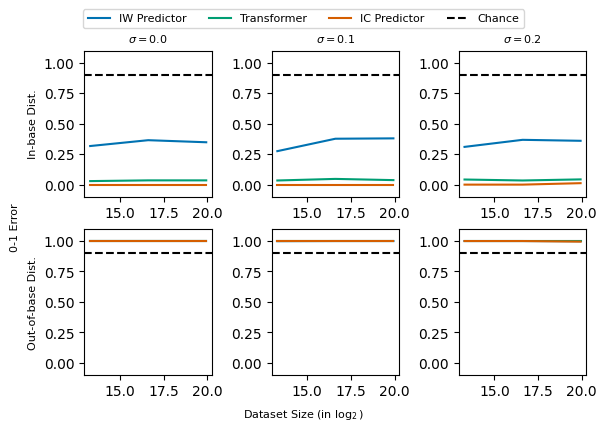

In [106]:
map_label = {
    0.0: "IW Predictor",
    1.0: "IC Predictor",
    0.9: "Transformer",
}
map_eval = {
    "eval-relevant_context-high_prob": "Rel. Context, High-freq.",
    "eval-relevant_context-low_prob": "Rel. Context, Low-freq.",
    "eval-irrelevant_context-high_prob": "Irrel. Context, High-freq.",
    "eval-irrelevant_context-low_prob": "Irrel. Context, Low-freq.",
    "eval-relevant_context-high_prob-flip_label": "Rel. Context, High-freq.",
    "eval-relevant_context-low_prob-flip_label": "Rel. Context, Low-freq.",
    "eval-irrelevant_context-high_prob-flip_label": "Irrel. Context, High-freq.",
    "eval-irrelevant_context-low_prob-flip_label": "Irrel. Context, Low-freq.",
    "eval-relevant_context-none": "Rel. Context, IBD",
    "eval-relevant_context-none-flip_label": "Rel. Context, OOBD",
    "eval-irrelevant_context-none": "Irrel. Context, High-freq., IBD",
    "eval-irrelevant_context-none-flip_label": "Irrel. Context, OOBD",
    "eval-default-none": "In-base Dist.",
    "eval-default-none-flip_label": "Out-of-base Dist.",
}

eval_names = [
    "eval-default-none",
    "eval-default-none-flip_label",
]

num_rows = 2
num_cols = len(input_noise_stds)
fig, axes = plt.subplots(
    num_rows,
    num_cols,
    figsize=set_size(doc_width_pt, 0.95, (num_rows, num_cols), use_golden_ratio=False),
    layout="constrained",
)
for col_i, input_noise_std in enumerate(input_noise_stds):
    for eval_i, eval_name in enumerate(eval_names):
        ax = axes[eval_i, col_i]
        # ax = axes[eval_i]
        for p_relevant_context in [0.0, 0.9, 1.0]:
            losses_mean = []
            losses_std = []

            for dataset_size in dataset_sizes:
                data = 1 - (np.array(stats[
                    (stats["p_relevant_context"] == f"{p_relevant_context}")
                    & (stats["input_noise_std"] == f"{input_noise_std}")
                    & (stats["stats_key"] == "accuracy")
                    & (stats["eval_name"] == eval_name)
                    & (stats["dataset_size"] == f"{dataset_size}")
                ]["stats"].to_list()))
                best_idx = best_idxes[(
                    p_relevant_context, input_noise_std, dataset_size
                )]
                sample = data[np.arange(num_seeds), best_idx]
                curr_mean = np.mean(sample)
                curr_std = np.std(sample)
                
                losses_mean.append(curr_mean)
                losses_std.append(curr_std)

            losses_mean = np.array(losses_mean)
            losses_std = np.array(losses_std) / np.sqrt(num_seeds)

            ax.plot(np.log2(np.array(dataset_sizes)), losses_mean, label=map_label[p_relevant_context] if eval_i == 0 and col_i == 0 else "")
            ax.fill_between(np.log2(np.array(dataset_sizes)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

        ax.axhline(9/10, label="Chance" if eval_i == 0 and col_i == 0 else "", c="black", linestyle="--")
        ax.set_ylim(-0.1, 1.1)

        if col_i == 0:
            ax.set_ylabel(map_eval[eval_name], fontsize="8")
    
    axes[0, col_i].set_title(f"$\\sigma = {input_noise_std}$", fontsize="8")

# fig.suptitle("Input Noise")
fig.supylabel("0-1 Error", fontsize="8")
fig.supxlabel("Dataset Size (in $\\log_2$)", fontsize="8")
fig.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=4,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)
# fig.tight_layout()
plt.savefig("noisy_inputs.pdf", dpi=600, format="pdf", bbox_inches="tight")

# Num grad steps

In [68]:
stats[
                (stats["p_relevant_context"] == f"{p_relevant_context}")
                # & (stats["input_noise_std"] == f"{input_noise_std}")
                & (stats["stats_key"] == "accuracy")
                # & (stats["eval_name"] == eval_name)
                # & (stats["dataset_size"] == f"{dataset_size}")
            ]

,dirname,variant,seed,eval_name,stats_key,stats,dataset_size,p_relevant_context,input_noise_std
171,omniglot-input_noise,dataset_size_100000-p_relevant_context_1.0-inp...,seed_1,eval-default-none-flip_label,accuracy,"[0.0, 0.002, 0.003, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",100000,1.0,0.0
174,omniglot-input_noise,dataset_size_100000-p_relevant_context_1.0-inp...,seed_1,eval-default-high_prob-flip_label,accuracy,"[0.0, 0.003, 0.004, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",100000,1.0,0.0
177,omniglot-input_noise,dataset_size_100000-p_relevant_context_1.0-inp...,seed_1,eval-default-low_prob-flip_label,accuracy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",100000,1.0,0.0
180,omniglot-input_noise,dataset_size_100000-p_relevant_context_1.0-inp...,seed_1,eval-relevant_context-none-flip_label,accuracy,"[0.0, 0.0, 0.007000000000000001, 0.002, 0.0, 0...",100000,1.0,0.0
183,omniglot-input_noise,dataset_size_100000-p_relevant_context_1.0-inp...,seed_1,eval-relevant_context-high_prob-flip_label,accuracy,"[0.0, 0.005, 0.011, 0.001, 0.0, 0.0, 0.0, 0.0,...",100000,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1524,omniglot-input_noise,dataset_size_1000000-p_relevant_context_1.0-in...,seed_1,eval-relevant_context-low_prob,accuracy,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1000000,1.0,0.2
1527,omniglot-input_noise,dataset_size_1000000-p_relevant_context_1.0-in...,seed_1,eval-irrelevant_context-none,accuracy,"[0.0, 0.07, 0.181, 0.504, 0.601, 0.316, 0.622,...",1000000,1.0,0.2
1530,omniglot-input_noise,dataset_size_1000000-p_relevant_context_1.0-in...,seed_1,eval-irrelevant_context-high_prob,accuracy,"[0.0, 0.09300000000000001, 0.267, 0.818, 0.961...",1000000,1.0,0.2
1533,omniglot-input_noise,dataset_size_1000000-p_relevant_context_1.0-in...,seed_1,eval-irrelevant_context-low_prob,accuracy,"[0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",1000000,1.0,0.2


In [69]:
input_noise_std, dataset_size, eval_name

(0.2, 1000000, 'eval-default-none-flip_label')

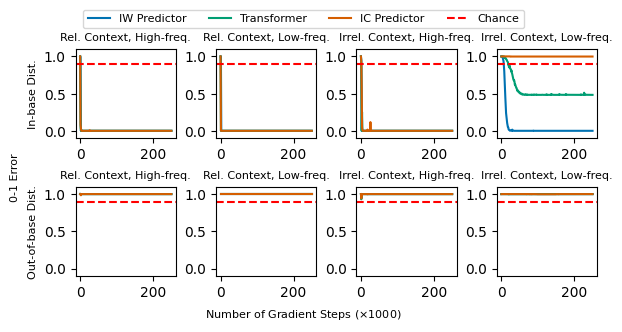

In [70]:
map_label = {
    0.0: "IW Predictor",
    1.0: "IC Predictor",
    0.9: "Transformer",
}
map_eval = {
    "eval-relevant_context-high_prob": "Rel. Context, High-freq.",
    "eval-relevant_context-low_prob": "Rel. Context, Low-freq.",
    "eval-irrelevant_context-high_prob": "Irrel. Context, High-freq.",
    "eval-irrelevant_context-low_prob": "Irrel. Context, Low-freq.",
    "eval-relevant_context-high_prob-flip_label": "Rel. Context, High-freq.",
    "eval-relevant_context-low_prob-flip_label": "Rel. Context, Low-freq.",
    "eval-irrelevant_context-high_prob-flip_label": "Irrel. Context, High-freq.",
    "eval-irrelevant_context-low_prob-flip_label": "Irrel. Context, Low-freq.",
    "eval-relevant_context-none": "Rel. Context, IBD",
    "eval-relevant_context-none-flip_label": "Rel. Context, OOBD",
    "eval-irrelevant_context-none": "Irrel. Context, IBD",
    "eval-irrelevant_context-none-flip_label": "Irrel. Context, OOBD",
}

eval_namess = [
    [
        "eval-relevant_context-high_prob",
        "eval-relevant_context-low_prob",
        "eval-irrelevant_context-high_prob",
        "eval-irrelevant_context-low_prob",
    ],
    [
        "eval-relevant_context-high_prob-flip_label",
        "eval-relevant_context-low_prob-flip_label",
        "eval-irrelevant_context-high_prob-flip_label",
        "eval-irrelevant_context-low_prob-flip_label",
    ],
]


input_noise_std = 0.2
dataset_size = 100000
checkpoint_interval = 1000

num_rows = 2
num_cols = 4
fig, axes = plt.subplots(
    num_rows,
    num_cols,
    figsize=set_size(doc_width_pt, 0.95, (num_rows, num_cols), use_golden_ratio=False),
    layout="constrained",
)
for row_i, eval_names in enumerate(eval_namess):
    for eval_i, eval_name in enumerate(eval_names):
        ax = axes[row_i, eval_i]
        for p_relevant_context in [0.0, 0.9, 1.0]:
            data = 1 - (np.array(stats[
                (stats["p_relevant_context"] == f"{p_relevant_context}")
                & (stats["input_noise_std"] == f"{input_noise_std}")
                & (stats["stats_key"] == "accuracy")
                & (stats["eval_name"] == eval_name)
                & (stats["dataset_size"] == f"{dataset_size}")
            ]["stats"].to_list()))

            losses_mean = np.mean(data, axis=0)
            losses_std = np.std(data, axis=0) / np.sqrt(num_seeds)

            ax.plot(range(len(losses_mean)), losses_mean, label=map_label[p_relevant_context] if eval_i == 0 and row_i == 0 else "")
            ax.fill_between(range(len(losses_mean)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

        ax.set_title(map_eval[eval_name], fontsize="8")
        ax.axhline(9/10, label="Chance" if eval_i == 0 and row_i == 0 else "", c="red", linestyle="--")
        ax.set_ylim(-0.1, 1.1)

        if eval_i == 0:
            ax.set_ylabel("In-base Dist." if row_i == 0 else "Out-of-base Dist.", fontsize="8")

fig.supylabel("0-1 Error", fontsize="8")
fig.supxlabel("Number of Gradient Steps ($\\times {}$)".format(checkpoint_interval), fontsize="8")
fig.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=4,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)
# fig.tight_layout()
plt.show()
# plt.savefig("num_low_prob_classes-num_updates.pdf", dpi=600, format="pdf", bbox_inches="tight")

0.0 1.4984603780021644e-08
0.9 0.016032356768846512
1.0 0.00020370027050375938


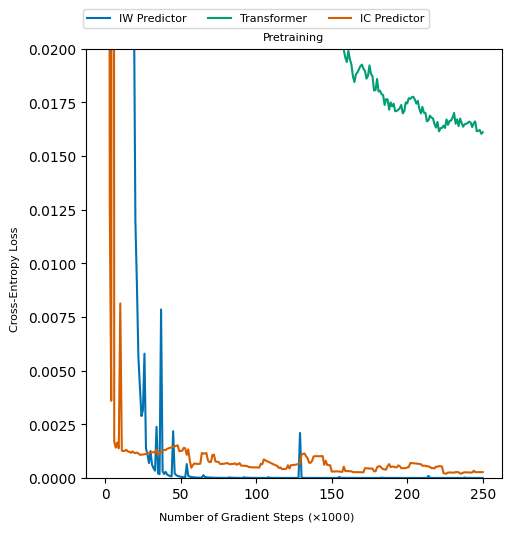

In [71]:
map_label = {
    0.0: "IW Predictor",
    1.0: "IC Predictor",
    0.9: "Transformer",
}
map_eval = {
    "eval-relevant_context-high_prob": "Rel. Context, High-freq.",
    "eval-relevant_context-low_prob": "Rel. Context, Low-freq.",
    "eval-irrelevant_context-high_prob": "Irrel. Context, High-freq.",
    "eval-irrelevant_context-low_prob": "Irrel. Context, Low-freq.",
    "eval-relevant_context-high_prob-flip_label": "Rel. Context, High-freq.",
    "eval-relevant_context-low_prob-flip_label": "Rel. Context, Low-freq.",
    "eval-irrelevant_context-high_prob-flip_label": "Irrel. Context, High-freq.",
    "eval-irrelevant_context-low_prob-flip_label": "Irrel. Context, Low-freq.",
    "eval-relevant_context-none": "Rel. Context, IBD",
    "eval-relevant_context-none-flip_label": "Rel. Context, OOBD",
    "eval-irrelevant_context-none": "Irrel. Context, IBD",
    "eval-irrelevant_context-none-flip_label": "Irrel. Context, OOBD",
    "pretraining": "Pretraining",
}

eval_namess = [
    [
        "eval-relevant_context-high_prob",
        "eval-relevant_context-low_prob",
        "eval-irrelevant_context-high_prob",
        "eval-irrelevant_context-low_prob",
    ],
    [
        "eval-relevant_context-high_prob-flip_label",
        "eval-relevant_context-low_prob-flip_label",
        "eval-irrelevant_context-high_prob-flip_label",
        "eval-irrelevant_context-low_prob-flip_label",
    ],
]


input_noise_std = 0.2
dataset_size = 1000000
checkpoint_interval = 1000

num_rows = 1
num_cols = 1
fig, axes = plt.subplots(
    num_rows,
    num_cols,
    figsize=(5, 5),
    layout="constrained",
)
eval_name = "pretraining"
ax = axes
for p_relevant_context in [0.0, 0.9, 1.0]:
    data = (np.array(stats[
        (stats["p_relevant_context"] == f"{p_relevant_context}")
        & (stats["input_noise_std"] == f"{input_noise_std}")
        & (stats["stats_key"] == "loss")
        & (stats["eval_name"] == eval_name)
        & (stats["dataset_size"] == f"{dataset_size}")
    ]["stats"].to_list()))

    losses_mean = np.mean(data, axis=0)
    losses_std = np.std(data, axis=0) / np.sqrt(5)
    print(p_relevant_context, np.min(losses_mean))

    ax.plot(range(len(losses_mean)), losses_mean, label=map_label[p_relevant_context])
    ax.fill_between(range(len(losses_mean)), losses_mean - losses_std, losses_mean + losses_std, alpha=0.3)

ax.set_title(map_eval[eval_name], fontsize="8")

ax.set_ylim(0.0, 0.02)
fig.supylabel("Cross-Entropy Loss", fontsize="8")
fig.supxlabel("Number of Gradient Steps ($\\times {}$)".format(checkpoint_interval), fontsize="8")
fig.legend(
    bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),
    loc="lower center",
    ncols=4,
    borderaxespad=0.0,
    frameon=True,
    fontsize="8", 
)
# fig.tight_layout()
plt.show()
# plt.savefig("num_low_prob_classes-num_updates.pdf", dpi=600, format="pdf", bbox_inches="tight")